In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load iris dataset
df = sns.load_dataset('iris')
df.head()
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,0.2,setosa
109,7.2,3.6,6.1,2.5,virginica
36,5.5,3.5,1.3,0.2,setosa
127,6.1,3.0,4.9,1.8,virginica
144,6.7,3.3,5.7,2.5,virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

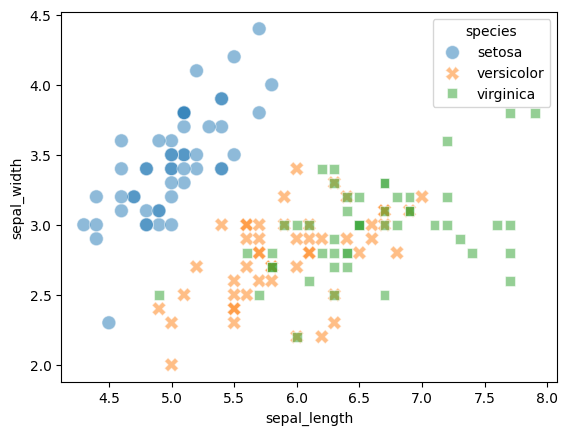

In [5]:
# scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species', style='species', alpha=0.5, edgecolor='w', s=100)

In [7]:
class_names,y = np.unique(df['species'], return_inverse=True)
print(class_names, y[45:150])

['setosa' 'versicolor' 'virginica'] [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
X = df.drop('species', axis=1)
X.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [14]:
# create standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
# splite data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [36]:
# create one hot encoder int for y
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_train_hot = ohe.fit_transform(y_train.reshape(-1,1)).astype('int').toarray()
y_test_hot = ohe.transform(y_test.reshape(-1,1)).astype('int').toarray()

y_train[:5], y_train_hot[:5]

# shape of y
y_train_hot.shape, y_test_hot.shape

((112, 3), (38, 3))

In [120]:
# create sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# add hidden layer
model.add(Dense(64, input_shape=(4,), activation='relu'))
# add output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.output_shape

(None, 3)

In [122]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
# train model
history = model.fit(X_train, y_train_hot, batch_size=16, epochs=70,validation_split=0.25, verbose=1)

Epoch 1/70


6/6 [==============================] - 0s 12ms/step - loss: 1.0915 - accuracy: 0.3690 - val_loss: 1.0533 - val_accuracy: 0.4643
Epoch 2/70
6/6 [==============================] - 0s 3ms/step - loss: 0.9780 - accuracy: 0.6190 - val_loss: 0.9807 - val_accuracy: 0.5357
Epoch 3/70
6/6 [==============================] - 0s 3ms/step - loss: 0.8840 - accuracy: 0.7262 - val_loss: 0.9188 - val_accuracy: 0.5357
Epoch 4/70
6/6 [==============================] - 0s 3ms/step - loss: 0.8003 - accuracy: 0.7619 - val_loss: 0.8662 - val_accuracy: 0.5357
Epoch 5/70
6/6 [==============================] - 0s 2ms/step - loss: 0.7331 - accuracy: 0.7500 - val_loss: 0.8205 - val_accuracy: 0.5357
Epoch 6/70
6/6 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.7500 - val_loss: 0.7847 - val_accuracy: 0.5357
Epoch 7/70
6/6 [==============================] - 0s 6ms/step - loss: 0.6299 - accuracy: 0.7500 - val_loss: 0.7539 - val_accuracy: 0.5357
Epoch 8/70
6/6 [============================

In [124]:
eval = model.evaluate(X_test, y_test_hot) # loss, accuracy
print(eval)
print(model.metrics_names)

2/2 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.8947
[0.2325042486190796, 0.8947368264198303]
['loss', 'accuracy']


In [125]:
# predict
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 1ms/step


array([[9.9324119e-01, 5.8784825e-03, 8.8034605e-04],
       [1.4444900e-01, 7.7021569e-01, 8.5335307e-02],
       [1.5167002e-02, 7.0195878e-01, 2.8287423e-01],
       [9.9609369e-01, 3.1053326e-03, 8.0092892e-04],
       [8.6453056e-04, 8.8345140e-02, 9.1079026e-01]], dtype=float32)

In [126]:
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class[:5])

# show class names of y_pred_class
y_pred_class_names = class_names[y_pred_class]
print(y_pred_class_names[:5])

[0 1 1 0 2]
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica']


In [127]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[13  0  0]
 [ 0 12  4]
 [ 0  0  9]]


Text(0.5, 1.0, 'accuracy')

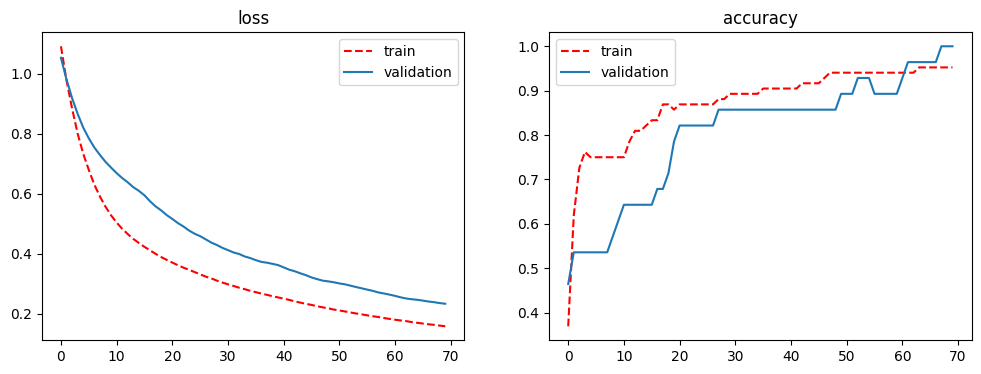

In [128]:
# create plot of loss and accuracy over epochs for train and validation side by side
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train', color='red', linestyle='--')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train', color='red', linestyle='--')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('accuracy')


In [129]:
# predict new 4 data set
new_data = np.array([[5.1, 3.5, 1.4, 0.2], [5.9, 3.0, 4.2, 1.5], [6.9, 3.1, 5.4, 2.1], [5.8, 2.7, 5.1, 1.9]])

new_data_sc = sc.transform(new_data)
new_data_sc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.25122143,  0.3957741 ],
       [ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721],
       [-0.05250608, -0.82256978,  0.76275827,  0.92230284]])

In [132]:
y_pred_new = model.predict(new_data_sc)
y_pred_new_max = np.argmax(y_pred_new, axis=1)
print(y_pred_new_max)
print(class_names[y_pred_new_max])

1/1 [==============================] - 0s 11ms/step
[0 1 2 2]
['setosa' 'versicolor' 'virginica' 'virginica']
